$$\textbf{Supervised Machine Learning}$$

$\textit{Supervised}$ machine learning: Learn to predict target values from labelled data. (Classification, target values are discrete values. Regression, target values are continuous values). 

$\textbf{References:}$ Applied machine learning in python, Coursera, University of Michigan

$$\textbf{Basic definitions}$$

$\textbf{Generalization}$: $\bullet$ Test set will come from the same distribution as training set

$\bullet$ $\textbf{Overfitting}$ happens when complexity is "bigger" in comparison with the amount of training data available. This case is not likely to generalize to new examples. 

$\bullet$ On the contrary, $\textbf{underfitting}$ occurs when the model is too simple that doesn't even do well on the training data. 

$\bullet$ Identifying overfitting is one of the most important aspects when applying SML methods. 

$$\textbf{Example of overfitting, underfitting in regression models}$$

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

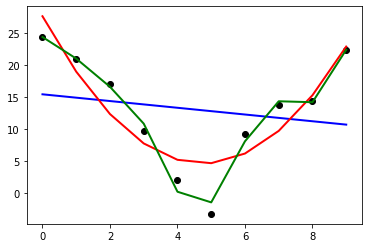

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

def create_data(n):
    e = np.random.normal(0,3,n)
    data = [ [[i] for i in range(n)] , [(i-n/2)**2 + n/2 + e[i] for i in range(n)]   ]
    return data
    
X, y = create_data(10)

#----------------------------------------------------------
linreg = LinearRegression().fit(X, y)
y_pred = linreg.predict(X)
plt.scatter(X, y,  color='black')
plt.plot(X, y_pred, color='blue', linewidth=2)
#----------------------------------------------------------
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
polyreg = LinearRegression().fit(X_poly, y)
y_pred_pol = polyreg.predict(X_poly)
plt.plot(X, y_pred_pol, color='red', linewidth=2)
#----------------------------------------------------------
poly = PolynomialFeatures(degree=8)
X_poly_2 = poly.fit_transform(X)
polyreg = LinearRegression().fit(X_poly_2, y)
y_pred_pol_2 = polyreg.predict(X_poly_2)
plt.plot(X, y_pred_pol_2, color='green', linewidth=2)


plt.show()

$$\textbf{Models in this script:}$$

$\bullet$ K-nearest neighbors: Few assumptions about the structure of the data, potentially accurate but sometimes unstable predictions. Sensitive to small changes in the training data.

$\bullet$ Linear models: Strong assumptions about the data structure of the data, stable but potentially inaccurate predictions. 

$\bullet$ Decision Trees:

$\bullet$ Neuronal networks:

$\bullet$ Support vector machines: 

$$\textbf{K-nearest neighbors}$$

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

#np.set_printoptions(precision=2)

fruits = pd.read_table('data/fruit_data_with_colors.txt')

features = ['height', 'width', 'mass', 'color_score']
X, y = fruits[ features ] , fruits['fruit_label']

target_names = ['apple', 'mandarin', 'orange', 'lemon']
target_names_fruits = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
# we must apply the scaling to the test set that we computed for the training set
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_scaled, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train_scaled, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test_scaled, y_test)))

example_fruit = [[5.5, 2.2, 10, 0.70]]
example_fruit_scaled = scaler.transform(example_fruit)
print('Predicted fruit type for ', example_fruit, ' is ', 
          target_names_fruits[knn.predict(example_fruit_scaled)[0]])

Accuracy of K-NN classifier on training set: 0.95
Accuracy of K-NN classifier on test set: 1.00
Predicted fruit type for  [[5.5, 2.2, 10, 0.7]]  is  mandarin


$$\textbf{Synthetic regression data}$$

0.799606806839527

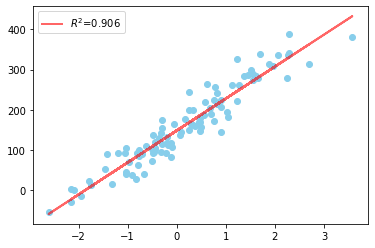

In [116]:
#Linear regression dataset
from sklearn.datasets import make_regression
X_R1, y_R1 = make_regression ( n_samples = 100, n_features =1, n_informative = 1, bias=150, noise=30 )

from sklearn.linear_model import LinearRegression
linreg = LinearRegression().fit(X_R1, y_R1)
y_pred_R1 = linreg.predict(X_R1)
plt.scatter(X_R1, y_R1,  color='skyblue')
r2 = round(linreg.score(X_R1,y_R1),3)
plt.plot(X_R1, y_pred_R1, color='red', label='$R^2$='+str(r2), alpha=0.6, linewidth=2)
plt.legend()

plt.show()

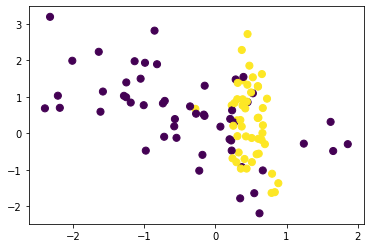

In [41]:
#Binary classification dataset
from sklearn.datasets import make_classification
X_D1, y_D1 = make_classification(n_samples = 100, n_features=2,  n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1, class_sep = 0.5, random_state=0)

plt.scatter(X_D1[:, 0], X_D1[:, 1], c = y_D1, marker= 'o', s=50 )
plt.show()

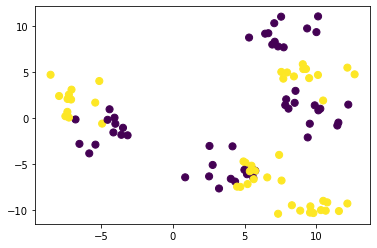

In [39]:
# more difficult synthetic dataset for classification (binary) 
# with classes that are not linearly separable
from sklearn.datasets import make_blobs
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=50)
plt.show()


$$\textbf{K-nearest neighbors}$$

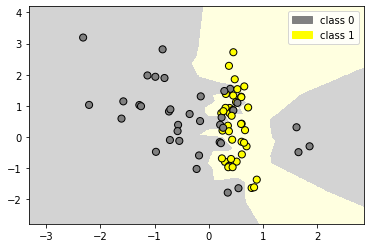

In [51]:
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
import matplotlib.patches as mpatches

X_train, X_test, y_train, y_test = train_test_split(X_D1, y_D1, random_state=0)

def plot_fruit_knn(X, y, n_neighbors, weights):
    X_0, y_0 = X , y

# Create color maps
    cmap_light = ListedColormap(['lightgray','lightyellow'])
    cmap_bold  = ListedColormap(['gray', 'yellow'])  
    
#Classifier
    clf = KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_0, y_0) 
    
# Plot the decision boundary by assigning a color in the color map
# to each mesh point.
    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50

    x_min, x_max = X_0[:, 0].min() - 1, X_0[:, 0].max() + 1
    y_min, y_max = X_0[:, 1].min() - 1, X_0[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])                    #Predict for each value on the grid
                                                                      #np.c_ create tuples, kind of a transpose
# Put the result into a color plot 
    Z = Z.reshape(xx.shape)
    #plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)                        #Plot each point on the grid with the Z-color
# Plot training points
    plt.scatter(X_0[:, 0], X_0[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    patch0 = mpatches.Patch(color='gray', label='class 0')
    patch1 = mpatches.Patch(color='yellow', label='class 1')
    plt.legend(handles=[patch0, patch1])
#plt.title("4-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights)) 
plot_fruit_knn(X_train, y_train, 1, 'uniform')

$$\textbf{k-Nearest neighbors regression}$$

In [57]:
from sklearn.neighbors import KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state = 0)

knnreg = KNeighborsRegressor(n_neighbors = 5).fit(X_train, y_train)

print(knnreg.predict(X_test))
print('R-squared test score: {:.3f}'
     .format(knnreg.score(X_test, y_test)))

[224.62189858 155.54638024 128.48574917 101.96696571  88.38302922
 218.68211269 155.54638024 110.58051405 110.58051405 101.96696571
  93.52070936 108.29837785 218.97176439 143.27164239  95.92628648
  94.63029302 218.68211269 118.86165823 162.56724363  88.38302922
 162.56724363 158.94215789  94.63029302 147.03252395  95.92628648]
R-squared test score: 0.690


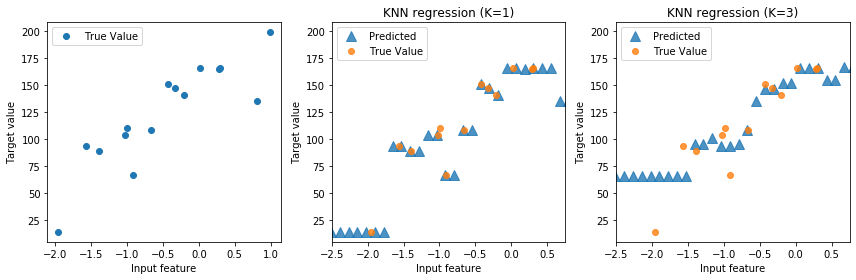

In [86]:
fig, subaxes = plt.subplots(1, 3, figsize=(12,4))
X_predict_input = np.linspace(-3, 3, 50).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_R1[0::5], y_R1[0::5], random_state = 0)
subaxes[0].plot(X_train, y_train, 'o', label='True Value' )
subaxes[0].legend(), subaxes[0].set_xlabel('Input feature') , subaxes[0].set_ylabel('Target value')

for f, K in zip(subaxes[1:], [1, 3]):
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    y_predict_output = knnreg.predict(X_predict_input)
    f.set_xlim([-2.5, 0.75])
    f.plot(X_predict_input, y_predict_output, '^', markersize = 10,
                 label='Predicted', alpha=0.8)
    f.plot(X_train, y_train, 'o', label='True Value', alpha=0.8)
    f.set_xlabel('Input feature') , f.set_ylabel('Target value')
    f.set_title('KNN regression (K={})'.format(K))
    f.legend()
plt.tight_layout()

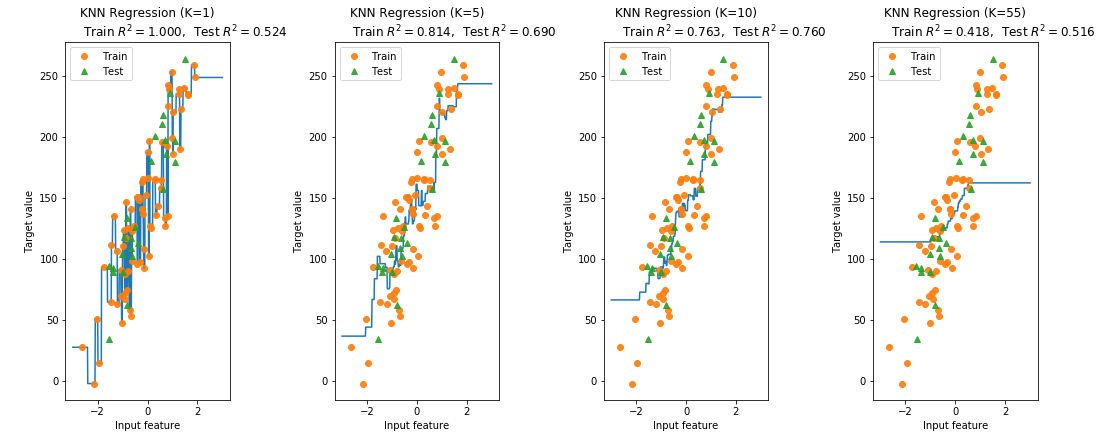

In [94]:
# plot k-NN regression on sample dataset for different values of K
fig, subaxes = plt.subplots(1, 4, figsize=(15,6))
X_predict_input = np.linspace(-3, 3, 500).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,
                                                   random_state = 0)

for f, K in zip(subaxes, [1, 5, 10, 55]):
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    y_predict_output = knnreg.predict(X_predict_input)
    train_score , test_score = knnreg.score(X_train, y_train) ,  knnreg.score(X_test, y_test)
    f.plot(X_predict_input, y_predict_output)
    f.plot(X_train, y_train, 'o', alpha=0.9, label='Train')
    f.plot(X_test, y_test, '^', alpha=0.9, label='Test')
    f.set_xlabel('Input feature') ,  f.set_ylabel('Target value')
    f.set_title('KNN Regression (K={})\n\
                    Train $R^2 = {:.3f}$,  Test $R^2 = {:.3f}$'
                      .format(K, train_score, test_score))
    f.legend()
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)


Complexity of the model and the value of K are inversely correlated

$$\textbf{Comparing linear regression to k-NN}$$

In [ ]:
from sklearn.datasets import make_regression
X_R1, y_R1 = make_regression ( n_samples = 100, n_features =1, n_informative = 1, bias=150, noise=30 )
X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,
                                                   random_state = 0)

fig, subaxes = plt.subplots(1, 2, figsize=(12,6))
from sklearn.linear_model import LinearRegression
linreg = LinearRegression().fit(X_train, y_train)
y_pred_R1 = linreg.predict(X_train)
plt.scatter(X_R1, y_R1,  color='skyblue')
r2 = round(linreg.score(X_R1,y_R1),3)
plt.plot(X_R1, y_pred_R1, color='red', label='$R^2$='+str(r2), alpha=0.6, linewidth=2)
plt.legend()

plt.show()

# plot k-NN regression on sample dataset for different values of K
X_predict_input = np.linspace(-3, 3, 500).reshape(-1,1)


for f, K in zip(subaxes, [1, 5, 10, 55]):
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    y_predict_output = knnreg.predict(X_predict_input)
    train_score , test_score = knnreg.score(X_train, y_train) ,  knnreg.score(X_test, y_test)
    f.plot(X_predict_input, y_predict_output)
    f.plot(X_train, y_train, 'o', alpha=0.9, label='Train')
    f.plot(X_test, y_test, '^', alpha=0.9, label='Test')
    f.set_xlabel('Input feature') ,  f.set_ylabel('Target value')
    f.set_title('KNN Regression (K={})\n\
                    Train $R^2 = {:.3f}$,  Test $R^2 = {:.3f}$'
                      .format(K, train_score, test_score))
    f.legend()
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

